In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet
from scipy.stats import multivariate_normal as multi_norm
from sklearn.linear_model import LinearRegression as Linear
from scipy.optimize import brentq,minimize
from scipy.special import perm,comb
import time
import pandas as pd
import qmcpy as qp

import warnings
warnings.filterwarnings("ignore")

**16.1**

In [2]:
d=10
n=1021
print(n)
halton=qp.Halton(d,randomize=False)
samples=halton.gen_samples(n)
print(samples.mean(axis=0))
lattice=qp.Lattice(d,randomize=False)
samples=lattice.gen_samples(n)
print(samples.mean(axis=0))

n=2039
print(n)
halton=qp.Halton(d,randomize=False)
samples=halton.gen_samples(n)
print(samples.mean(axis=0))
lattice=qp.Lattice(d,randomize=False)
samples=lattice.gen_samples(n)
print(samples.mean(axis=0))

n=4093
print(n)
halton=qp.Halton(d,randomize=False)
samples=halton.gen_samples(n)
print(samples.mean(axis=0))
lattice=qp.Lattice(d,randomize=False)
samples=lattice.gen_samples(n)
print(samples.mean(axis=0))

1021
[0.499 0.498 0.498 0.498 0.497 0.496 0.496 0.496 0.496 0.495]
[0.499 0.499 0.5   0.499 0.499 0.5   0.5   0.5   0.5   0.499]
2039
[0.499 0.499 0.499 0.499 0.498 0.499 0.498 0.497 0.497 0.496]
[0.499 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.499 0.499]
4093
[0.5   0.499 0.499 0.499 0.499 0.499 0.499 0.498 0.499 0.499]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


**16.5**

In [3]:
def wing(X):
    tmp1=0.036*(X[:,0]**0.758)*(X[:,1]**0.0035)
    tmp2=(X[:,2]/np.cos(X[:,3])**2)**0.6
    tmp3=(X[:,4]**0.006)*(X[:,5]**0.04)
    tmp4=((100*X[:,6])/np.cos(X[:,3]))**(-0.3)
    tmp5=(X[:,7]*X[:,8])**0.49
    return tmp1*tmp2*tmp3*tmp4*tmp5+X[:,0]*X[:,9]

def main(discrete):
    lower_bound=[150,220,6,-np.pi/18,16,0.5,0.08,2.5,1700,0.025]
    upper_bound=[200,300,10,np.pi/18,45,1,0.18,6,2500,0.08]
    uniform=qp.Uniform(discrete,lower_bound,upper_bound)
    integrand=qp.CustomFun(uniform,wing)
    return integrand

In [4]:
halton=qp.Halton(10,randomize=True)
integrand=main(halton)

criterion=qp.CubQMCCLT(integrand,abs_tol=1e-2)
solution,data=criterion.integrate()
print(solution)

268.07647519527757


In [5]:
sobol=qp.Sobol(10,randomize=True)
integrand=main(sobol)

criterion=qp.CubQMCCLT(integrand,abs_tol=1e-2)
solution,data=criterion.integrate()
print(solution)

criterion=qp.CubQMCSobolG(integrand,abs_tol=1e-2)
solution,data=criterion.integrate()
print(solution)

268.0763596269545
268.0753094474329


In [6]:
lattice=qp.Lattice(10,randomize=True)
integrand=main(lattice)

criterion=qp.CubQMCCLT(integrand,abs_tol=1e-2)
solution,data=criterion.integrate()
print(solution)

criterion=qp.CubQMCLatticeG(integrand,abs_tol=1e-2)
solution,data=criterion.integrate()
print(solution)

268.0782160847078
268.0752338466738


In [7]:
def draw():
    samples=ld.gen_samples(n)[:,select]
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[0].scatter(samples[:,0],samples[:,1])
    ax[0].set_xlabel('D-'+str(select[0]+1))
    ax[0].set_ylabel('D-'+str(select[1]+1))
    ax[1].scatter(samples[:,2],samples[:,3])
    ax[1].set_xlabel('D-'+str(select[2]+1))
    ax[1].set_ylabel('D-'+str(select[3]+1))
    plt.show()

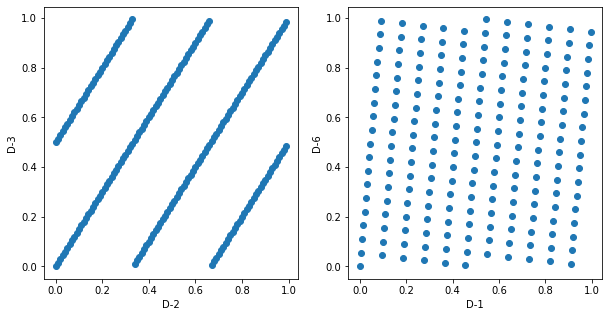

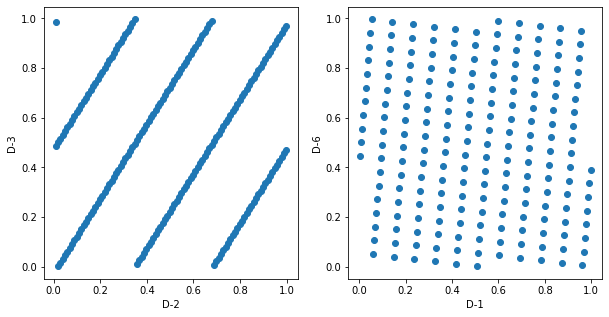

In [8]:
d=10
n=200
select=np.append(np.random.choice(np.arange(10),2,replace=False),\
                 np.random.choice(np.arange(d),2,replace=False))

ld=qp.Korobov(d,generator=[1,2,3,5,7,11,13,17,19,23],randomize=False)
draw()
ld=qp.Korobov(d,generator=[1,2,3,5,7,11,13,17,19,23],randomize=True)
draw()